Machine learning regression Task<br/>
Mwaniki George ICS 4B  101833 


In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.linear_model import LassoCV

In [21]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Nairobi Office Price Ex.csv')

In [22]:
nominal = ['LOC','FUR','WATER','HK_SER']
ordinal = ['AMB','PROX_SCH','PROX_ROAD','PROX_MALL']
numerical = ['SIZE']
target = ['PRICE']

In [23]:
# Encoding
for col in ordinal:
  label_encoder = LabelEncoder()
  new_col = label_encoder.fit_transform(data[col])
  data[col] = new_col

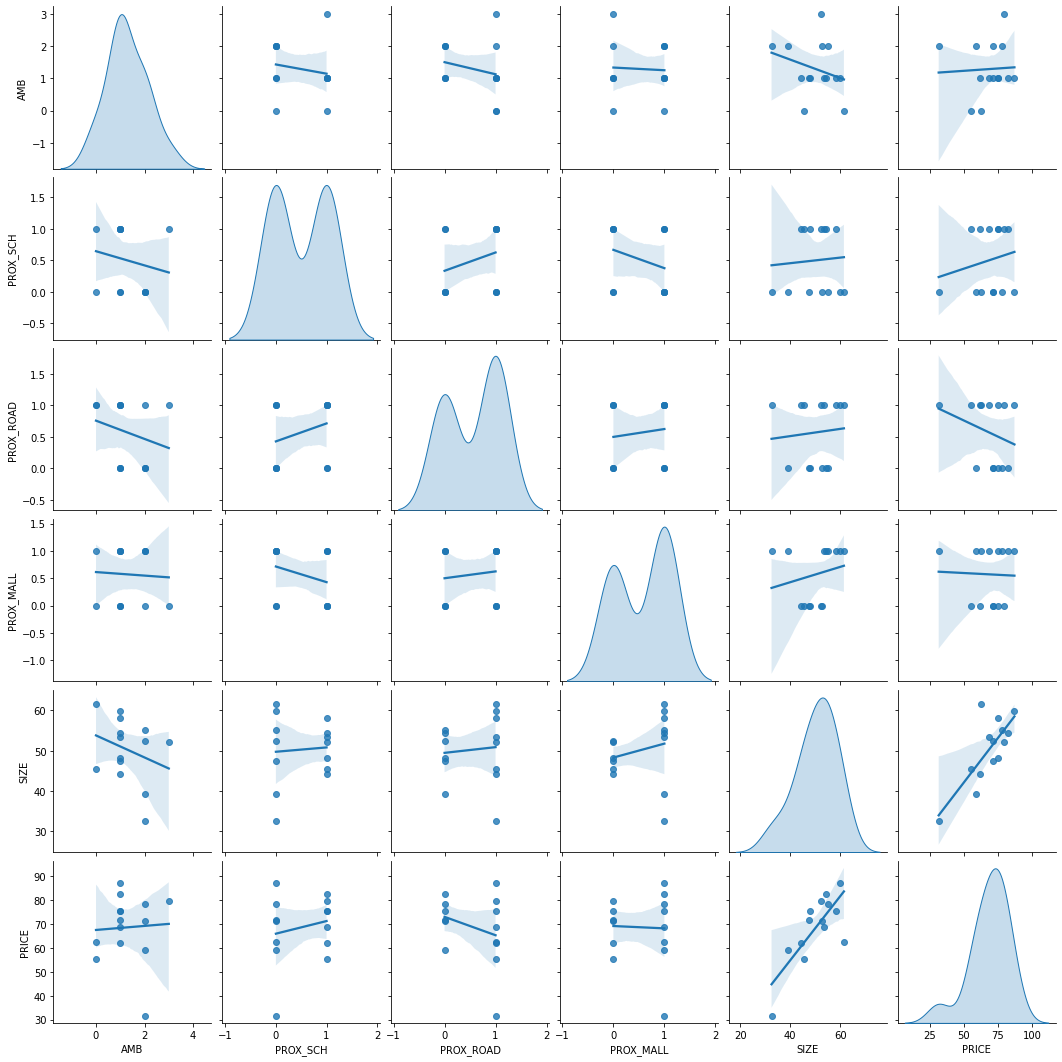

In [24]:
sb.pairplot(data, kind='reg', diag_kind='kde')

In [25]:
dummies = pd.get_dummies(data[nominal])
data = pd.concat([dummies, data], axis=1)
data.drop(nominal, axis=1, inplace=True)

In [26]:
#Standardize the dataset
transformer = PowerTransformer()
transformed_data = transformer.fit_transform(data)
data = pd.DataFrame(transformed_data, columns=data.columns)


Lasso Reguralization

In [27]:
y=data["PRICE"]
x=data.drop("PRICE", axis=1)
y

0    -2.060592
1    -0.178865
2    -0.673078
3     0.069057
4     1.827632
5     0.740273
6     0.898605
7    -0.908206
8     0.436974
9     0.046338
10   -1.156423
11    1.228105
12   -0.713071
13    0.443250
Name: PRICE, dtype: float64

In [28]:
l_cv=LassoCV()
l_cv.fit(x,y)
indices=[i for i, x in enumerate(l_cv.coef_) if x != 0]
print(f'Selected cols: {len(indices)} of {len(l_cv.coef_)}')
print(f'Cols: {x.columns[indices]}')

Selected cols: 3 of 16
Cols: Index(['FUR_no', 'FUR_yes', 'SIZE'], dtype='object')


L1 Embedding

In [29]:
new_columns = x.columns[indices]
x = x[new_columns]
X_data = x.to_numpy()
y_data = y.to_numpy()

In [30]:
@tf.function
def ANN() -> Model:
  I = Input(shape=(3,))
  x = Dense(64, activation='relu')(I)
  x = Dense(32, activation='relu')(x)
  x = Dense(1)(x)
  return Model(I, x)  

model = ANN()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics='mae')
early_stopping = EarlyStopping(patience=2, monitor='loss')
history = model.fit(X_data[:-5], y_data[:-5], batch_size=15, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 0s 40ms/step - loss: 1.3003 - mae: 0.8761
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 0.7485 - mae: 0.7306
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.5832 - mae: 0.6157
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 0.5605 - mae: 0.5607
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.5637 - mae: 0.5541
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 0.5375 - mae: 0.5398
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 0.4889 - mae: 0.5037
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 0.4352 - mae: 0.4748
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 0.4034 - mae: 0.4511
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 0.3965 - mae: 0.4569
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - lo

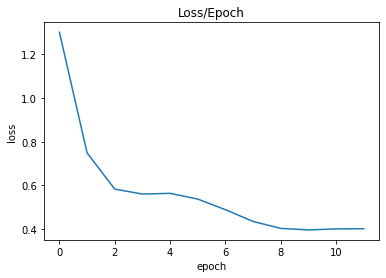

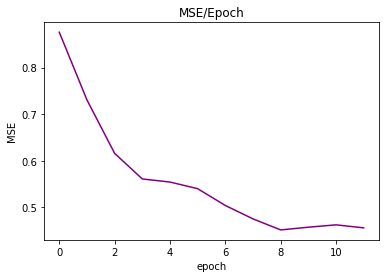

In [32]:
plt.plot(history.history["loss"])
plt.title('Loss/Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print('\n')
plt.plot(history.history["mae"], color="purple")
plt.title('MSE/Epoch')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

In [33]:
eval_history = model.evaluate(X_data, y_data, batch_size=15)
print(f'Loss: {eval_history[0]}, MAE: {eval_history[1]} ')

1/1 [==============================] - 0s 32ms/step - loss: 0.4060 - mae: 0.4777
Loss: 0.40595918893814087, MAE: 0.4777391254901886 


In [34]:
X_predict = X_data[-5: ]
y_true = y_data[-5: ]
P = model.predict(X_predict).squeeze()
print(f'Values:\n{y_true}\nPrediction\n{P}')

Values:
[ 0.04633848 -1.15642297  1.22810525 -0.71307098  0.44325019]
Prediction
[ 0.28966165  0.00742601  0.5434578  -0.21464922  0.3105824 ]
